<a href="https://colab.research.google.com/github/PrinceChoudhary8/CNN-PROJECT/blob/main/Solution_Cat_or_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


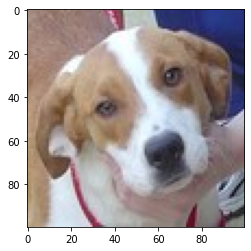

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 19s 571ms/step - loss: 0.7308 - accuracy: 0.5115
Epoch 2/5
32/32 [==============================] - 21s 655ms/step - loss: 0.6693 - accuracy: 0.6030
Epoch 3/5
32/32 [==============================] - 18s 572ms/step - loss: 0.6245 - accuracy: 0.6525
Epoch 4/5
32/32 [==============================] - 18s 569ms/step - loss: 0.5957 - accuracy: 0.6870
Epoch 5/5
32/32 [==============================] - 19s 588ms/step - loss: 0.5212 - accuracy: 0.7470


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 78ms/step - loss: 0.5776 - accuracy: 0.6975


[0.5775744915008545, 0.6974999904632568]

# Making predictions

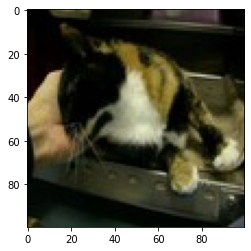

Our model says it is a : cat


In [43]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)